# Lab 1 - AI5308/AI4005 (Data Engineering) - 2024 Spring
Made by Mintaek Lim, Revised by Yoonjae, Sungho, Proofreaded by Sundong (Released at 3/12)

This tutorial is aligned with the [Homework 1](https://sundong.kim/courses/dataeng24sp/hw1/), so please follow with the contents carefully.

1.   Implement simple python crawler!
2.   Crawl data from https://www.mlb.com/stats/2022 - "MLB hitter stats"
3.   Store data in Excel format
4.   Conduct simple ML prediction

## **Homework was done following the example from the [tutorial](https://colab.research.google.com/drive/1TzXY3GqPSawnUWZAef1PvjILa9KhLD5B?usp=sharing). **



### Import library and set web driver for Chrome browers

In [1]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.by import By
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.2/467.2 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00


### MLB 2022

### Data crawling

In [2]:
# If the below code is failed or print only a few players, please run the cell again.

## set driver url to crawler

driver.get('https://www.mlb.com/stats/2022')

## find element from web
table = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[1]/div/table')

header_items = table.find_elements(By.XPATH, './thead/tr/th')
headers = [h.text for h in header_items]

## print properties
print(headers)

## find element from web
body = []
while True:
  time.sleep(2)

  ## crawl from the first page and save it using driver.find_element method
  body_items = table.find_elements(By.XPATH, './tbody/tr')
  for b in body_items:
    row_title = b.find_elements(By.XPATH, './th')
    row_items = b.find_elements(By.XPATH, './td')
    row = [r.text for r in row_title] + [r.text for r in row_items]

    ## since the first element in each column is in the form '1\nShoheiOhtani\nDH',
    ## we tokenize it and make it an individual element.
    row = row[0].split('\n') + row[1:]
    body.append(row)
    print(row)
  try:
    cookie_button = driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
    cookie_button.click()
  except:
    pass
  try:
    next_button = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[2]/div/div/div[last()]/button')
    next_button.click()
  except:
    break

['PLAYER', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']
['1', 'AaronJudge', 'CF', 'NYY', '157', '570', '133', '177', '28', '0', '62', '131', '111', '175', '16', '3', '.311', '.425', '.686', '1.111']
['2', 'YordanAlvarez', 'DH', 'HOU', '135', '470', '95', '144', '29', '2', '37', '97', '78', '106', '1', '1', '.306', '.406', '.613', '1.019']
['3', 'PaulGoldschmidt', '1B', 'STL', '151', '561', '106', '178', '41', '0', '35', '115', '79', '141', '7', '0', '.317', '.404', '.578', '.982']
['4', 'JoseAltuve', '2B', 'HOU', '141', '527', '103', '158', '39', '0', '28', '57', '66', '87', '18', '1', '.300', '.387', '.533', '.920']
['5', 'FreddieFreeman', '1B', 'LAD', '159', '612', '117', '199', '47', '2', '21', '100', '84', '102', '13', '3', '.325', '.407', '.511', '.918']
['6', 'MannyMachado', '3B', 'SD', '150', '578', '100', '172', '37', '1', '32', '102', '63', '133', '9', '1', '.298', '.366', '.531', '.897']
['7', 'NolanArenado', '3B', 

In [3]:
## adding two more element in headers
headers.insert(0, 'Rank')
headers.insert(2, 'Position')

## Create a dataframe with 'headers' as a column and 'body' as the content.
df_mlb = pd.DataFrame(body)
df_mlb.columns = headers
df_mlb = df_mlb.set_index('Rank')

## final data frame (expected size should be 130, 19 - If smaller, run the previous cell again)
df_mlb

,PLAYER,Position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
Rank,,,,,,,,,,,,,,,,,,,
1,AaronJudge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,.311,.425,.686,1.111
2,YordanAlvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,.306,.406,.613,1.019
3,PaulGoldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,.317,.404,.578,.982
4,JoseAltuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,.300,.387,.533,.920
5,FreddieFreeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,.325,.407,.511,.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,TrentGrisham,CF,SD,152,451,58,83,16,2,17,53,57,150,7,1,.184,.284,.341,.625
127,AdamFrazier,2B,SEA,156,541,61,129,22,4,3,42,46,73,11,6,.238,.301,.311,.612
128,MiguelRojas,SS,MIA,140,471,34,111,19,2,6,36,26,61,9,3,.236,.283,.323,.606


In [4]:
## conneting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## save data frame as xlsx file
df_mlb = df_mlb.to_excel('/content/sample_data/MLB2022.xlsx', index=False)

### ML prediction


*   Using the crawled data, we will run a machine learning task
*   For simple tutorial, we'll see how to predict the number of homeruns from other stats



In [6]:
df_mlb = pd.read_excel('/content/sample_data/MLB2022.xlsx')
X_df = df_mlb.drop('HR', axis=1) ## delete HR data (it will be answer) from data frame
X_df = X_df.drop(['PLAYER', 'Position', 'TEAM'], axis=1) ## delete non-floating number data
X_df

,G,AB,R,H,2B,3B,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,157,570,133,177,28,0,131,111,175,16,3,0.311,0.425,0.686,1.111
1,135,470,95,144,29,2,97,78,106,1,1,0.306,0.406,0.613,1.019
2,151,561,106,178,41,0,115,79,141,7,0,0.317,0.404,0.578,0.982
3,141,527,103,158,39,0,57,66,87,18,1,0.300,0.387,0.533,0.920
4,159,612,117,199,47,2,100,84,102,13,3,0.325,0.407,0.511,0.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,152,451,58,83,16,2,53,57,150,7,1,0.184,0.284,0.341,0.625
126,156,541,61,129,22,4,42,46,73,11,6,0.238,0.301,0.311,0.612
127,140,471,34,111,19,2,36,26,61,9,3,0.236,0.283,0.323,0.606
128,152,535,72,118,22,3,32,54,87,21,1,0.221,0.291,0.273,0.564


In [7]:
y_df = df_mlb['HR'] ## setting HR data as y (target of prediction)
y_df

0      62
1      37
2      35
3      28
4      21
       ..
125    17
126     3
127     6
128     0
129    11
Name: HR, Length: 130, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
## define train data and test data
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size=0.2, random_state=0xc0ffee)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(104, 15) (26, 15) (104,) (26,)


In [9]:
from sklearn.preprocessing import StandardScaler
## scale the data
scalr = StandardScaler()
X_train = scalr.fit_transform(X_train)
X_test = scalr.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [11]:
## train Linear Regression and Ridge Regression model and check the errors
reg1  = LinearRegression()
reg1.fit(X_train, y_train)
pred_train1 = reg1.predict(X_train)
pred_val1 = reg1.predict(X_test)
mse_train1 = mean_squared_error(y_train, pred_train1)
mse_val1 = mean_squared_error(y_test, pred_val1)

reg2 = Ridge()
reg2.fit(X_train, y_train)
pred_train2 = reg2.predict(X_train)
pred_val2 = reg2.predict(X_test)
mse_train2 = mean_squared_error(y_train, pred_train2)
mse_val2 = mean_squared_error(y_test, pred_val2)

print("1. Linear Regresion\t, train = %.4f, val = %.4f" %(mse_train1, mse_val1))
print("2. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))

1. Linear Regresion	, train = 0.3675, val = 1.2218
2. Ridge		, train = 0.4277, val = 1.2663


### Data Visualization
Here is the sample code to visualize the prediction results.

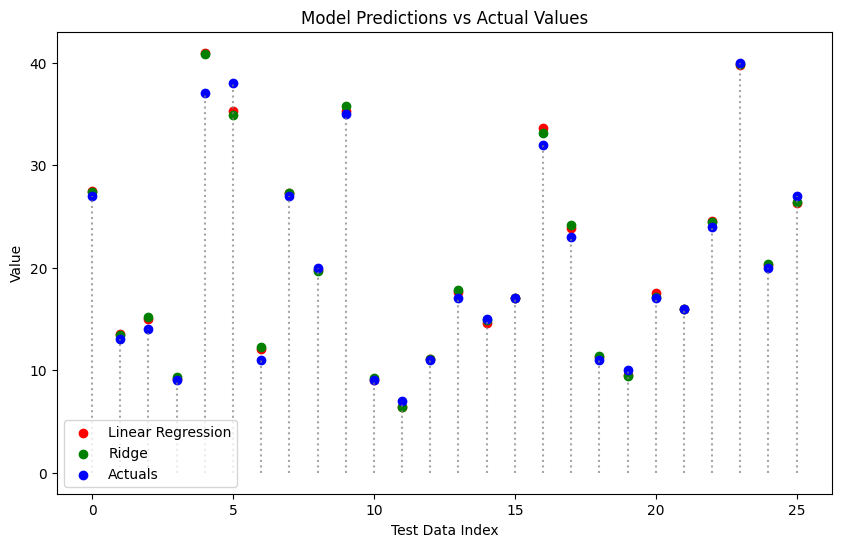

In [12]:
import matplotlib.pyplot as plt

y_test =  y_test.astype(int).values

# Drawing scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(range(len(pred_val1)), pred_val1, color='r', label='Linear Regression')
plt.scatter(range(len(pred_val2)), pred_val2, color='g', label='Ridge')
plt.scatter(range(len(y_test)), y_test, color='b', label='Actuals')

for i in range(len(y_test)):
    plt.vlines(x=i, ymin=0, ymax=y_test[i], colors='gray', linestyles='dotted', alpha=0.7)

plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.title('Model Predictions vs Actual Values')
plt.legend()

plt.show()

In [13]:
# compare this with [MLB 2022 home-run](https://www.mlb.com/stats/home-runs/2022).
df_mlb['HR'] = df_mlb['HR'].astype('int')
df_mlb[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

#df_mlb1['HR'] = df_mlb1['HR'].astype('int')
#df_mlb1[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

,PLAYER,HR
0,AaronJudge,62
1,KyleSchwarber,46
2,PeteAlonso,40
3,AustinRiley,38
4,YordanAlvarez,37
5,ChristianWalker,36
6,RowdyTellez,35
7,MookieBetts,35
8,PaulGoldschmidt,35
9,ShoheiOhtani,34


### Question for HW1:
Design an ML system to predict the top 20 home run hitters in the MLB 2024 season. The system should predict results similar to the table below. Note that the 2024 MLB season is ongoing and will last until Sep 29, 2024, which means you should devise a better prediction scheme.

It is strongly recommended to use Google Colab (Feel free to copy this page and use it on your own purpose). Include your thoughts alongside your code, using Markdown for formatting. You will submit both the shareable link and a PDF of your notebook after running all your code. [(See how to export a Colab notebook to PDF)](https://sundong.kim/courses/dataeng24sp/print-colab.png)

### Data crawling for current time(Spring Training time).


---


- The final day of Spring Training is March 26.

In [14]:
# If the below code is failed or print only a few players, please run the cell again.

## set driver url to crawler
driver.get('https://www.mlb.com/stats/')

## find element from web
table1 = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[1]/div/table')

header_items = table1.find_elements(By.XPATH, './thead/tr/th')
headers1 = [h.text for h in header_items]

## print properties
print(headers1)

## find element from web
body1 = []
while True:
  time.sleep(2)

  ## crawl from the first page and save it using driver.find_element method
  body_items = table1.find_elements(By.XPATH, './tbody/tr')
  for b in body_items:
    row_title = b.find_elements(By.XPATH, './th')
    row_items = b.find_elements(By.XPATH, './td')
    row = [r.text for r in row_title] + [r.text for r in row_items]

    ## since the first element in each column is in the form '1\nShoheiOhtani\nDH',
    ## we tokenize it and make it an individual element.
    row = row[0].split('\n') + row[1:]
    body1.append(row)
    print(row)
  try:
    next_button = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[2]/div/div/div[2]/button')
    next_button.click()
    #    //*[@id="stats-app-root"]/section/section/div[3]/div[2]/div/div/div[2]/button
  except:
    break

  try:
    cookie_button = driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
    cookie_button.click()
  except:
    pass

['PLAYER', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']
['1', 'JamesWood', 'RF', 'WSH', '22', '44', '13', '16', '1', '1', '4', '7', '11', '13', '3', '1', '.364', '.509', '.705', '1.214']
['2', 'WyattLangford', 'LF', 'TEX', '19', '56', '13', '21', '2', '0', '6', '20', '5', '15', '0', '0', '.375', '.429', '.732', '1.161']
['3', 'ChristianEncarnacion-Strand', '1B', 'CIN', '15', '48', '13', '16', '2', '3', '4', '12', '3', '6', '0', '0', '.333', '.385', '.750', '1.135']
['4', 'MookieBetts', '2B', 'LAD', '13', '34', '10', '15', '3', '0', '1', '3', '5', '6', '0', '1', '.441', '.513', '.618', '1.131']
['5', 'LuisMatos', 'CF', 'SF', '20', '51', '14', '16', '6', '0', '4', '11', '3', '8', '1', '1', '.314', '.375', '.667', '1.042']
['6', 'AlexBregman', '3B', 'HOU', '16', '47', '8', '18', '4', '0', '2', '8', '4', '7', '0', '0', '.383', '.431', '.596', '1.027']
['7', 'CobyMayo', '3B', 'BAL', '23', '50', '7', '18', '7', '0', '1', '11', '6',

In [15]:
## adding two more element in headers
headers1.insert(0, 'Rank')
headers1.insert(2, 'Position')

## Create a dataframe with 'headers' as a column and 'body' as the content.
df_mlb_training = pd.DataFrame(body1)
df_mlb_training.columns = headers1
df_mlb_training = df_mlb_training.set_index('Rank')

## final data frame
df_mlb_training

,PLAYER,Position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
Rank,,,,,,,,,,,,,,,,,,,
1,JamesWood,RF,WSH,22,44,13,16,1,1,4,7,11,13,3,1,.364,.509,.705,1.214
2,WyattLangford,LF,TEX,19,56,13,21,2,0,6,20,5,15,0,0,.375,.429,.732,1.161
3,ChristianEncarnacion-Strand,1B,CIN,15,48,13,16,2,3,4,12,3,6,0,0,.333,.385,.750,1.135
4,MookieBetts,2B,LAD,13,34,10,15,3,0,1,3,5,6,0,1,.441,.513,.618,1.131
5,LuisMatos,CF,SF,20,51,14,16,6,0,4,11,3,8,1,1,.314,.375,.667,1.042
6,AlexBregman,3B,HOU,16,47,8,18,4,0,2,8,4,7,0,0,.383,.431,.596,1.027
7,CobyMayo,3B,BAL,23,50,7,18,7,0,1,11,6,12,1,0,.360,.448,.560,1.008
8,TreyLipscomb,2B,WSH,20,48,6,19,2,1,1,7,5,7,1,2,.396,.453,.542,.995
8,JacksonMerrill,CF,SD,13,37,8,13,3,0,2,6,3,3,2,0,.351,.400,.595,.995


In [16]:
## drive already mounted at /content/drive
## conneting google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

In [17]:
## save data frame as xlsx file
df_mlb_training = df_mlb_training.to_excel('/content/sample_data/MLB2024_Training.xlsx', index=False)

### ML prediction for Spring Training time


*   Using the crawled data, we will run a machine learning task
*   For simple tutorial, we'll see how to predict the number of homeruns from other stats



In [18]:
df_mlb_training = pd.read_excel('/content/sample_data/MLB2024_Training.xlsx')
X_df_mlb_training = df_mlb_training.drop('HR', axis=1) ## delete HR data (it will be answer) from data frame
X_df_mlb_training = X_df_mlb_training.drop(['PLAYER', 'Position', 'TEAM'], axis=1) ## delete non-floating number data
X_df_mlb_training

,G,AB,R,H,2B,3B,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,22,44,13,16,1,1,7,11,13,3,1,0.364,0.509,0.705,1.214
1,19,56,13,21,2,0,20,5,15,0,0,0.375,0.429,0.732,1.161
2,15,48,13,16,2,3,12,3,6,0,0,0.333,0.385,0.750,1.135
3,13,34,10,15,3,0,3,5,6,0,1,0.441,0.513,0.618,1.131
4,20,51,14,16,6,0,11,3,8,1,1,0.314,0.375,0.667,1.042
5,16,47,8,18,4,0,8,4,7,0,0,0.383,0.431,0.596,1.027
6,23,50,7,18,7,0,11,6,12,1,0,0.360,0.448,0.560,1.008
7,20,48,6,19,2,1,7,5,7,1,2,0.396,0.453,0.542,0.995
8,13,37,8,13,3,0,6,3,3,2,0,0.351,0.400,0.595,0.995
9,16,47,8,15,3,1,9,5,10,3,0,0.319,0.377,0.617,0.994


In [19]:
y_df_mlb_training = df_mlb_training['HR']## setting HR data as y (target of prediction)
y_df_mlb_training

0     4
1     6
2     4
3     1
4     4
5     2
6     1
7     1
8     2
9     3
10    5
11    1
12    3
13    3
14    2
15    4
16    3
17    2
18    2
19    3
20    3
21    1
22    0
23    1
24    2
25    3
26    3
27    2
28    2
29    2
30    1
31    1
32    3
33    0
34    5
35    2
36    3
37    2
38    1
39    1
40    1
41    1
42    0
43    0
44    1
45    0
46    2
47    0
48    1
49    2
Name: HR, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
## define train data and test data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_df_mlb_training,y_df_mlb_training, test_size=0.2, random_state=0xc0ffee)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(40, 15) (10, 15) (40,) (10,)


In [21]:
from sklearn.preprocessing import StandardScaler
## scale the data
scalr = StandardScaler()
X_train1 = scalr.fit_transform(X_train1)
X_test1 = scalr.transform(X_test1)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [23]:
## train Linear Regression and Ridge Regression model and check the errors
reg1  = LinearRegression()
reg1.fit(X_train1, y_train1)
pred_train1 = reg1.predict(X_train1)
pred_val1 = reg1.predict(X_test1)
mse_train1 = mean_squared_error(y_train1, pred_train1)
mse_val1 = mean_squared_error(y_test1, pred_val1)

reg2 = Ridge()
reg2.fit(X_train1, y_train1)
pred_train2 = reg2.predict(X_train1)
pred_val2 = reg2.predict(X_test1)
mse_train2 = mean_squared_error(y_train1, pred_train2)
mse_val2 = mean_squared_error(y_test1, pred_val2)

print("1. Linear Regresion\t, train = %.4f, val = %.4f" %(mse_train1, mse_val1))
print("2. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))

1. Linear Regresion	, train = 0.0207, val = 0.1526
2. Ridge		, train = 0.0269, val = 0.1614


### Data Visualization for Spring Training time
Here is the sample code to visualize the prediction results.

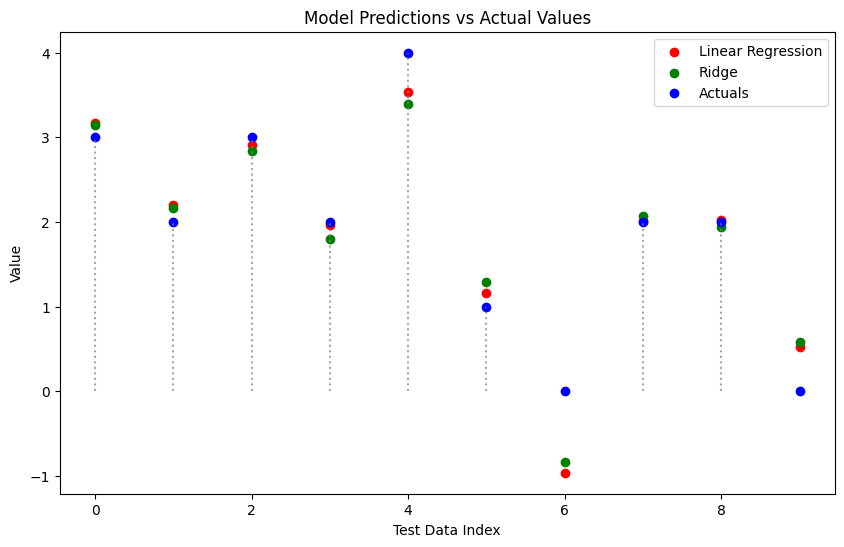

In [24]:
import matplotlib.pyplot as plt

y_test1 =  y_test1.astype(int).values

# Drawing scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(range(len(pred_val1)), pred_val1, color='r', label='Linear Regression')
plt.scatter(range(len(pred_val2)), pred_val2, color='g', label='Ridge')
plt.scatter(range(len(y_test1)), y_test1, color='b', label='Actuals')

for i in range(len(y_test1)):
    plt.vlines(x=i, ymin=0, ymax=y_test1[i], colors='gray', linestyles='dotted', alpha=0.7)

plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.title('Model Predictions vs Actual Values')
plt.legend()

plt.show()

In [25]:
df_mlb_training['HR'] = df_mlb_training['HR'].astype('int')
df_mlb_training[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

,PLAYER,HR
0,WyattLangford,6
1,MarkVientos,5
2,MichaelToglia,5
3,JamesWood,4
4,ZackGelof,4
5,ChristianEncarnacion-Strand,4
6,LuisMatos,4
7,BrettBaty,3
8,ElehurisMontero,3
9,GavinSheets,3


### Prediction by using data from Spring Training time

In [26]:
features = ['OPS']# On-base plus slugging
X = df_mlb_training[features]
y = df_mlb_training['HR']  # Home runs

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction on unseen data (2024 season) by using data from Spring Training time
y_pred = model.predict(X_test)

# Top 10 predicted home run hitters
top_10_idx = y_pred.argsort()[:10]
top_10_players = df_mlb_training.iloc[top_10_idx]['PLAYER'].to_list()

print("Top 10 predicted home run hitters for 2024:")
for player in top_10_players:
  print(player)

Top 10 predicted home run hitters for 2024:
MookieBetts
AlexBregman
WyattLangford
ChristianEncarnacion-Strand
CobyMayo
TreyLipscomb
JamesWood
SpencerSteer
JacksonMerrill
LuisMatos


### MLB 2023

### Data crawling for Regular Season 2023

In [28]:
## set driver url to crawler

driver.get('https://www.mlb.com/stats/2023')

## find element from web
table2 = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[1]/div/table')

header_items = table2.find_elements(By.XPATH, './thead/tr/th')
headers2 = [h.text for h in header_items]

## print properties
print(headers2)

## find element from web
body2 = []
while True:
  time.sleep(2)

  ## crawl from the first page and save it using driver.find_element method
  body_items = table2.find_elements(By.XPATH, './tbody/tr')
  for b in body_items:
    row_title = b.find_elements(By.XPATH, './th')
    row_items = b.find_elements(By.XPATH, './td')
    row = [r.text for r in row_title] + [r.text for r in row_items]

    ## since the first element in each column is in the form '1\nShoheiOhtani\nDH',
    ## we tokenize it and make it an individual element.
    row = row[0].split('\n') + row[1:]
    body2.append(row)
    print(row)
  try:
    cookie_button = driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
    cookie_button.click()
  except:
    pass
  try:
    next_button = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[2]/div/div/div[last()]/button')
    next_button.click()
  except:
    break

['PLAYER', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']
['1', 'ShoheiOhtani', 'DH', 'LAA', '135', '497', '102', '151', '26', '8', '44', '95', '91', '143', '20', '6', '.304', '.412', '.654', '1.066']
['2', 'CoreySeager', 'SS', 'TEX', '119', '477', '88', '156', '42', '0', '33', '96', '49', '88', '2', '1', '.327', '.390', '.623', '1.013']
['3', 'RonaldAcuña', 'RF', 'ATL', '159', '643', '149', '217', '35', '4', '41', '106', '80', '84', '73', '14', '.337', '.416', '.596', '1.012']
['4', 'MattOlson', '1B', 'ATL', '162', '608', '127', '172', '27', '3', '54', '139', '104', '167', '1', '0', '.283', '.389', '.604', '.993']
['5', 'MookieBetts', 'RF', 'LAD', '152', '584', '126', '179', '40', '1', '39', '107', '96', '107', '14', '3', '.307', '.408', '.579', '.987']
['6', 'FreddieFreeman', '1B', 'LAD', '161', '637', '131', '211', '59', '2', '29', '102', '72', '121', '23', '1', '.331', '.410', '.567', '.977']
['7', 'YandyDíaz', '1B', 'TB', 

In [29]:
## adding two more element in headers
headers2.insert(0, 'Rank')
headers2.insert(2, 'Position')

## Create a dataframe with 'headers' as a column and 'body' as the content.
df_mlb_2023_regular = pd.DataFrame(body2)
df_mlb_2023_regular.columns = headers2
df_mlb_2023_regular = df_mlb_2023_regular.set_index('Rank')

## final data frame (expected size should be 130, 19 - If smaller, run the previous cell again)
df_mlb_2023_regular

,PLAYER,Position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
Rank,,,,,,,,,,,,,,,,,,,
1,ShoheiOhtani,DH,LAA,135,497,102,151,26,8,44,95,91,143,20,6,.304,.412,.654,1.066
2,CoreySeager,SS,TEX,119,477,88,156,42,0,33,96,49,88,2,1,.327,.390,.623,1.013
3,RonaldAcuña,RF,ATL,159,643,149,217,35,4,41,106,80,84,73,14,.337,.416,.596,1.012
4,MattOlson,1B,ATL,162,608,127,172,27,3,54,139,104,167,1,0,.283,.389,.604,.993
5,MookieBetts,RF,LAD,152,584,126,179,40,1,39,107,96,107,14,3,.307,.408,.579,.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,ZachMcKinstry,3B,DET,148,464,60,107,21,4,9,35,44,113,16,6,.231,.302,.351,.653
131,EnriqueHernández,2B,LAD,140,465,57,110,23,0,11,61,34,97,4,1,.237,.289,.357,.646
132,MylesStraw,CF,CLE,147,462,52,110,18,3,1,29,42,97,20,6,.238,.301,.297,.598


In [30]:
## drive already mounted at /content/drive
## conneting google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

In [31]:
## save data frame as xlsx file
df_mlb_2023_regular = df_mlb_2023_regular.to_excel('/content/sample_data/MLB2023_Regular.xlsx', index=False)

### ML prediction for Regular Season 2023


*   Using the crawled data, we will run a machine learning task
*   For simple tutorial, we'll see how to predict the number of homeruns from other stats



In [32]:
df_mlb_2023_regular = pd.read_excel('/content/sample_data/MLB2023_Regular.xlsx')
X_df_mlb_2023_regular = df_mlb_2023_regular.drop('HR', axis=1) ## delete HR data (it will be answer) from data frame
X_df_mlb_2023_regular = X_df_mlb_2023_regular.drop(['PLAYER', 'Position', 'TEAM'], axis=1) ## delete non-floating number data
X_df_mlb_2023_regular

,G,AB,R,H,2B,3B,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,135,497,102,151,26,8,95,91,143,20,6,0.304,0.412,0.654,1.066
1,119,477,88,156,42,0,96,49,88,2,1,0.327,0.390,0.623,1.013
2,159,643,149,217,35,4,106,80,84,73,14,0.337,0.416,0.596,1.012
3,162,608,127,172,27,3,139,104,167,1,0,0.283,0.389,0.604,0.993
4,152,584,126,179,40,1,107,96,107,14,3,0.307,0.408,0.579,0.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,148,464,60,107,21,4,35,44,113,16,6,0.231,0.302,0.351,0.653
130,140,465,57,110,23,0,61,34,97,4,1,0.237,0.289,0.357,0.646
131,147,462,52,110,18,3,29,42,97,20,6,0.238,0.301,0.297,0.598
132,136,510,58,113,18,4,59,24,125,12,0,0.222,0.267,0.325,0.592


In [33]:
y_df_mlb_2023_regular = df_mlb_2023_regular['HR']## setting HR data as y (target of prediction)
y_df_mlb_2023_regular

0      44
1      33
2      41
3      54
4      39
       ..
129     9
130    11
131     1
132     9
133     1
Name: HR, Length: 134, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
## define train data and test data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_df_mlb_2023_regular,y_df_mlb_2023_regular, test_size=0.2, random_state=0xc0ffee)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(107, 15) (27, 15) (107,) (27,)


In [35]:
from sklearn.preprocessing import StandardScaler
## scale the data
scalr = StandardScaler()
X_train2 = scalr.fit_transform(X_train2)
X_test2 = scalr.transform(X_test2)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [37]:
## train Linear Regression and Ridge Regression model and check the errors
reg1  = LinearRegression()
reg1.fit(X_train2, y_train2)
pred_train1 = reg1.predict(X_train2)
pred_val1 = reg1.predict(X_test2)
mse_train1 = mean_squared_error(y_train2, pred_train1)
mse_val1 = mean_squared_error(y_test2, pred_val1)

reg2 = Ridge()
reg2.fit(X_train2, y_train2)
pred_train2 = reg2.predict(X_train2)
pred_val2 = reg2.predict(X_test2)
mse_train2 = mean_squared_error(y_train2, pred_train2)
mse_val2 = mean_squared_error(y_test2, pred_val2)

print("1. Linear Regresion\t, train = %.4f, val = %.4f" %(mse_train1, mse_val1))
print("2. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))

1. Linear Regresion	, train = 0.5532, val = 1.3544
2. Ridge		, train = 0.6128, val = 1.4670


### Data Visualization for Regular Season 2023

Here is the sample code to visualize the prediction results.

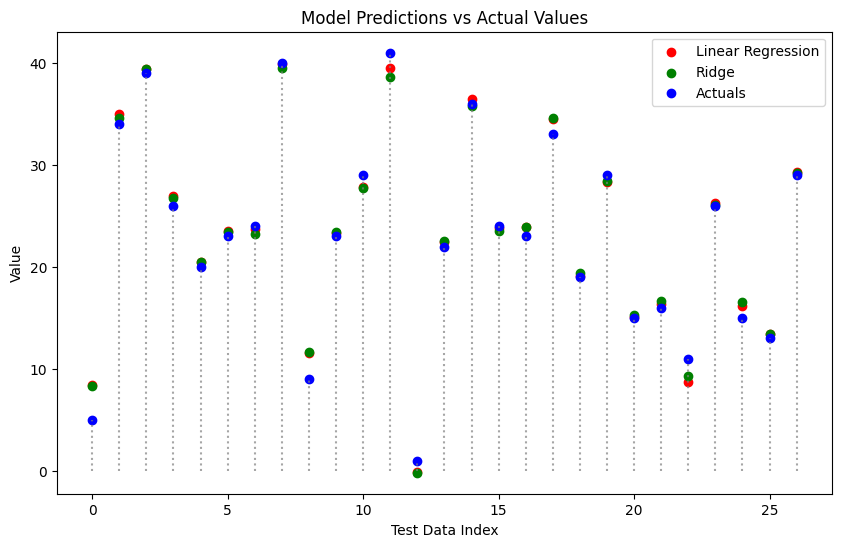

In [38]:
import matplotlib.pyplot as plt

y_test2 = y_test2.astype(int).values

# Drawing scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(range(len(pred_val1)), pred_val1, color='r', label='Linear Regression')
plt.scatter(range(len(pred_val2)), pred_val2, color='g', label='Ridge')
plt.scatter(range(len(y_test2)), y_test2, color='b', label='Actuals')

for i in range(len(y_test2)):
    plt.vlines(x=i, ymin=0, ymax=y_test2[i], colors='gray', linestyles='dotted', alpha=0.7)

plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.title('Model Predictions vs Actual Values')
plt.legend()

plt.show()

In [39]:
df_mlb_2023_regular['HR'] = df_mlb_2023_regular['HR'].astype('int')
df_mlb_2023_regular[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

,PLAYER,HR
0,MattOlson,54
1,KyleSchwarber,47
2,PeteAlonso,46
3,ShoheiOhtani,44
4,RonaldAcuña,41
5,MarcellOzuna,40
6,MookieBetts,39
7,AdolisGarcía,39
8,LuisRobert,38
9,AustinRiley,37


### Compare MLB 2022 and MLB 2023

In [40]:
df_mlb['HR'] = df_mlb['HR'].astype('int') # MLB 2022
df_mlb_2023_regular['HR'] = df_mlb_2023_regular['HR'].astype('int') # MLB 2023

# Sort top 20 players with highest HR in each dataframe
top_20_mlb = df_mlb[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)
top_20_mlb_2023_regular = df_mlb_2023_regular[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

# Concatenate dataframes
comparison_df = pd.concat([top_20_mlb, top_20_mlb_2023_regular], axis=1, keys=['MLB 2022', 'MLB 2023'])

# Display the comparison dataframe
comparison_df
#print(comparison_df)

MLB 2022             MLB 2023    
              PLAYER  HR           PLAYER  HR
0         AaronJudge  62        MattOlson  54
1      KyleSchwarber  46    KyleSchwarber  47
2         PeteAlonso  40       PeteAlonso  46
3        AustinRiley  38     ShoheiOhtani  44
4      YordanAlvarez  37      RonaldAcuña  41
5    ChristianWalker  36     MarcellOzuna  40
6        RowdyTellez  35      MookieBetts  39
7        MookieBetts  35     AdolisGarcía  39
8    PaulGoldschmidt  35       LuisRobert  38
9       ShoheiOhtani  34      AustinRiley  37
10         MattOlson  34         MaxMuncy  36
11       CoreySeager  33       JorgeSoler  36
12  AnthonySantander  33         JuanSoto  35
13      MannyMachado  32       JakeBurger  34
14      AnthonyRizzo  32  ChristianWalker  33
15  VladimirGuerrero  32     RafaelDevers  33
16     EugenioSuárez  31      OzzieAlbies  33
17       WillyAdames  31      CoreySeager  33
18        KyleTucker  30   JulioRodríguez  32
19      NolanArenado  30  FranciscoLindor  31

In [41]:
# Extract top 20 players from df_mlb and df_mlb1
top_20_mlb = df_mlb[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)
top_20_mlb_2023_regular = df_mlb_2023_regular[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

# Find same players between df_mlb and df_mlb1
common_players = pd.merge(top_20_mlb, top_20_mlb_2023_regular, on='PLAYER', suffixes=('_mlb_2022', '_mlb_2023'), how='inner')

#print(common_players)
common_players

,PLAYER,HR_mlb_2022,HR_mlb_2023
0,KyleSchwarber,46,47
1,PeteAlonso,40,46
2,AustinRiley,38,37
3,ChristianWalker,36,33
4,MookieBetts,35,39
5,ShoheiOhtani,34,44
6,MattOlson,34,54
7,CoreySeager,33,33


### Prediction by using data from 2023 Regular Season

In [42]:
df_mlb_2023_regular['wOBA'] = df_mlb_2023_regular['OBP'] + df_mlb_2023_regular['SLG']  # On-base plus slugging

features = ['wOBA']
X = df_mlb_2023_regular[features]
y = df_mlb_2023_regular['HR']  # Home Runs

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction for 2024 season
y_pred = model.predict(X_test)

# Top 20 predicted home run hitters (assuming y_pred represents predictions)
top_20_idx = y_pred.argsort()[:20]  # Get indices of top 20 predictions
top_20_players = df_mlb_2023_regular.iloc[top_20_idx]['PLAYER'].to_list()

print("Top 20 predicted home run hitters for 2024:")
for player in top_20_players:
  print(player)

Top 20 predicted home run hitters for 2024:
ChristianWalker
JuanSoto
OzzieAlbies
KetelMarte
LuisRobert
MarcellOzuna
BryceHarper
YandyDíaz
ShoheiOhtani
MookieBetts
KyleTucker
TristonCasas
RonaldAcuña
FreddieFreeman
AustinRiley
CoreySeager
CodyBellinger
JoséRamírez
RafaelDevers
IsaacParedes


* Using more features

In [43]:
def create_features(data):
  data['wOBA'] = data['OBP'] + data['SLG']  # On-base plus slugging
  data['ISO'] = data['SLG'] - data['AVG']  # Isolated slugging
  data['PA'] = data['H'] + data['BB'] + data['AB']  # Plate Appearance.
  data['K%'] = (data['SO'] / data['PA']) * 100  # Strikeout rate (potential for outs)
  data['BB%'] = (data['BB'] / data['PA']) * 100  # Walk rate (on-base opportunities)
  return data

df_mlb_predict_2023 = create_features(df_mlb_2023_regular.copy())  # Avoid modifying original DataFrame

# Filter relevant features
features = ['wOBA', 'ISO', 'K%', 'BB%']
X = df_mlb_predict_2023[features]
Y = df_mlb_predict_2023['HR']  # Home runs

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model selection and training
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

# Prediction for 2024 season
Y_pred = model.predict(X_test)

# Top 20 predicted home run leaders (assuming y_pred represents predictions)
top_20_idx = Y_pred.argsort()[:20]  # Get top 20 predictions
top_20_players = df_mlb_predict_2023.iloc[top_20_idx]['PLAYER'].to_list()

print("Top 20 predicted home run leaders for 2024:")
for player in top_20_players:
  print(player)

Top 20 predicted home run leaders for 2024:
LuisRobert
BryceHarper
RafaelDevers
ShoheiOhtani
OzzieAlbies
AustinRiley
MookieBetts
MarcellOzuna
JuanSoto
RonaldAcuña
ChristianWalker
KetelMarte
SeiyaSuzuki
TristonCasas
FreddieFreeman
LuisArraez
CoreySeager
CodyBellinger
JoséRamírez
MattOlson


* Addtional code

In [44]:
df_mlb_predict1_2023 = create_features(df_mlb_2023_regular.copy())

# Features
X = df_mlb_predict1_2023[["OPS", "ISO"]]
y = df_mlb_predict1_2023["HR"]

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=2)  # You can choose important features
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

# Model selection
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction for 2024 season
y_pred = model.predict(X_test)

# Top 20 predicted home run leaders (assuming y_pred represents predictions)
top_20_idx = y_pred.argsort()[:20]  # Get top 20 predictions
top_20_players = df_mlb_predict1_2023.iloc[top_20_idx]['PLAYER'].to_list()

print("Top 20 predicted home run leaders for 2024:")
for player in top_20_players:
  print(player)

Top 20 predicted home run leaders for 2024:
JuanSoto
ShoheiOhtani
MookieBetts
CorbinCarroll
JorgeSoler
LuisRobert
RonaldAcuña
JoséRamírez
KyleTucker
KetelMarte
MarcellOzuna
TristonCasas
BryceHarper
RafaelDevers
FreddieFreeman
SeiyaSuzuki
MattOlson
IsaacParedes
AustinRiley
LuisArraez


### Predict home runs for players



---

* I've already compiled the Top 20 Predicted Home Run Leaders for 2024. Now let's look at their HR statistics.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif

* Predict HR stats for one player

In [46]:
# Load data from your Excel file
df_mlb_2023_regular_test = pd.read_excel("/content/sample_data/MLB2023_Regular.xlsx")

# Feature engineering
df_mlb_2023_regular_test["wOBA"] = df_mlb_2023_regular_test["OBP"] + df_mlb_2023_regular_test["SLG"]
df_mlb_2023_regular_test["ISO"] = df_mlb_2023_regular_test["SLG"] - df_mlb_2023_regular_test["AVG"]
df_mlb_2023_regular_test["PA"] = df_mlb_2023_regular_test["H"] + df_mlb_2023_regular_test["BB"] + df_mlb_2023_regular_test["AB"]  # Plate Appearances
df_mlb_2023_regular_test["K%"] = (df_mlb_2023_regular_test["SO"] / df_mlb_2023_regular_test["PA"]) * 100  # Strikeout Rate
df_mlb_2023_regular_test["BB%"] = (df_mlb_2023_regular_test["BB"] / df_mlb_2023_regular_test["PA"]) * 100  # Walk Rate


# Feature selection
X = df_mlb_2023_regular_test[["wOBA", "ISO", "K%", "BB%", "PA"]]  # Add advanced features here
y = df_mlb_2023_regular_test["HR"]
selector = SelectKBest(f_classif, k=5)  # Choose number of features
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model selection and hyperparameter tuning
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluate model performance (additional)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict HR stats for one player
new_player_name = "ChristianWalker"  # Replace with desired player name
new_player_data = df_mlb_2023_regular_test[df_mlb_2023_regular_test["PLAYER"] == new_player_name]  # Select player data
new_player_features = new_player_data[["wOBA", "ISO", "K%", "BB%", "PA"]]
new_player_features_selected = selector.transform(new_player_features)
new_player_features_scaled = scaler.transform(new_player_features_selected)  # If using standardization
predicted_hr = model.predict(new_player_features_scaled)[0]  # Assuming single prediction

print(f"Predicted HR for {new_player_name}: {predicted_hr:.2f}")

Mean Squared Error: 14.971540740740737
Predicted HR for ChristianWalker: 31.51


* Prediction for a list of new players

In [47]:
# Prediction for a list of new players
new_player_names = ["ChristianWalker", "ShoheiOhtani", "AustinRiley", "BrandonNimmo", "JorgeSoler",
                    "MarcellOzuna", "KyleTucker", "SeiyaSuzuki", "JuanSoto", "CodyBellinger",
                    "FreddieFreeman", "KetelMarte", "RafaelDevers", "MookieBetts", "OzzieAlbies",
                    "LuisRobert", "TristonCasas", "MattOlson", "RonaldAcuña", "JoséRamírez"]  # List of player names

predicted_hr = []
for player_name in new_player_names:
  new_player_data = df_mlb_2023_regular_test[df_mlb_2023_regular_test["PLAYER"] == player_name]  # Select player data
  if not new_player_data.empty:  # Check if player data exists
      new_player_features = new_player_data[["wOBA", "ISO", "K%", "BB%", "PA"]]
      new_player_features_selected = selector.transform(new_player_features)
      new_player_features_scaled = scaler.transform(new_player_features_selected)  # If using standardization
      predicted_hr.append(model.predict(new_player_features_scaled)[0])  # Assuming single prediction
  else:
      print(f"Player data not found for {player_name}")
      predicted_hr.append(None)

sorted_results = sorted(zip(predicted_hr, new_player_names), reverse=True)
predicted_hr, new_player_names = zip(*sorted_results)  # Sorted results

print("Predicted HRs:")
for i, name in enumerate(new_player_names):
  if predicted_hr[i] is not None:  # Check if prediction exists
    print(f"{i+1}. {name}: {predicted_hr[i]:.2f}")  # Print name and predicted HR
  else:
    print(f"{i+1}. {name}: Data not found")  # Inform about missing data

Predicted HRs:
1. MattOlson: 50.57
2. ShoheiOhtani: 46.08
3. MarcellOzuna: 41.42
4. RonaldAcuña: 40.70
5. LuisRobert: 39.39
6. MookieBetts: 39.21
7. JorgeSoler: 37.44
8. JuanSoto: 33.51
9. ChristianWalker: 31.51
10. OzzieAlbies: 31.35
11. AustinRiley: 30.96
12. RafaelDevers: 30.11
13. FreddieFreeman: 29.63
14. KyleTucker: 29.06
15. KetelMarte: 27.25
16. CodyBellinger: 26.52
17. TristonCasas: 24.63
18. BrandonNimmo: 24.12
19. JoséRamírez: 24.09
20. SeiyaSuzuki: 21.36


In [48]:
# Create a DataFrame
results_df = pd.DataFrame({"Player": new_player_names, "Predicted HR": predicted_hr})

mlb_2023_regular = df_mlb_2023_regular[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

# Concatenate dataframes
concatenate_df = pd.concat([results_df, mlb_2023_regular], axis=1, keys=['Predicted MLB results', 'MLB 2023'])
concatenate_df

Predicted MLB results                      MLB 2023    
                  Player Predicted HR           PLAYER  HR
0              MattOlson        50.57        MattOlson  54
1           ShoheiOhtani        46.08    KyleSchwarber  47
2           MarcellOzuna        41.42       PeteAlonso  46
3            RonaldAcuña        40.70     ShoheiOhtani  44
4             LuisRobert        39.39      RonaldAcuña  41
5            MookieBetts        39.21     MarcellOzuna  40
6             JorgeSoler        37.44      MookieBetts  39
7               JuanSoto        33.51     AdolisGarcía  39
8        ChristianWalker        31.51       LuisRobert  38
9            OzzieAlbies        31.35      AustinRiley  37
10           AustinRiley        30.96         MaxMuncy  36
11          RafaelDevers        30.11       JorgeSoler  36
12        FreddieFreeman        29.63         JuanSoto  35
13            KyleTucker        29.06       JakeBurger  34
14            KetelMarte        27.25  ChristianWalker  33
15         CodyBellinger        26.52     RafaelDevers  33
16          TristonCasas        24.63      OzzieAlbies  33
17          BrandonNimmo        24.12      CoreySeager  33
18           JoséRamírez        24.09   JulioRodríguez  32
19           SeiyaSuzuki        21.36  FranciscoLindor  31

### Addtional training of MLB 2024 Regular Season


---

There's not enough information there, so few games have been played. But let there be information about MLB 2024 Regular Season.

* Data crawling for Regular Season 2024

In [49]:
## set driver url to crawler

driver.get('https://www.mlb.com/stats/regular-season')

## find element from web
table3 = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[1]/div/table')

header_items = table3.find_elements(By.XPATH, './thead/tr/th')
headers3 = [h.text for h in header_items]

## print properties
print(headers3)

## find element from web
body3 = []
while True:
  time.sleep(2)

  ## crawl from the first page and save it using driver.find_element method
  body_items = table3.find_elements(By.XPATH, './tbody/tr')
  for b in body_items:
    row_title = b.find_elements(By.XPATH, './th')
    row_items = b.find_elements(By.XPATH, './td')
    row = [r.text for r in row_title] + [r.text for r in row_items]

    ## we tokenize it and make it an individual element.
    row = row[0].split('\n') + row[1:]
    body3.append(row)
    print(row)
  try:
    cookie_button = driver.find_element(By.XPATH, '//*[@id="onetrust-accept-btn-handler"]')
    cookie_button.click()
  except:
    pass
  try:
    next_button = driver.find_element(By.XPATH, '//*[@id="stats-app-root"]/section/section/div[3]/div[2]/div/div/div[last()]/button')
    next_button.click()
  except:
    break

['PLAYER', 'TEAM', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB', 'CS', 'AVG', 'OBP', 'SLG', 'OPS']
['1', 'MookieBetts', 'SS', 'LAD', '2', '9', '2', '6', '1', '0', '1', '7', '2', '0', '0', '0', '.667', '.727', '1.111', '1.838']
['2', 'TylerWade', '3B', 'SD', '2', '5', '2', '3', '0', '0', '0', '1', '1', '1', '0', '0', '.600', '.667', '.600', '1.267']
['3', 'JakeCronenworth', '1B', 'SD', '2', '8', '2', '4', '0', '1', '0', '4', '0', '2', '0', '0', '.500', '.500', '.750', '1.250']
['4', 'WillSmith', 'C', 'LAD', '2', '10', '1', '5', '1', '0', '0', '2', '1', '2', '0', '0', '.500', '.545', '.600', '1.145']
['5', 'MannyMachado', 'DH', 'SD', '2', '7', '3', '1', '0', '0', '1', '3', '3', '1', '0', '0', '.143', '.400', '.571', '.971']
['6', 'XanderBogaerts', '2B', 'SD', '2', '9', '3', '4', '0', '0', '0', '3', '1', '2', '0', '0', '.444', '.500', '.444', '.944']
['7', 'MaxMuncy', '3B', 'LAD', '2', '9', '2', '3', '1', '0', '0', '0', '2', '5', '0', '0', '.333', '.455', '.444', '.899']

In [50]:
## adding two more element in headers
headers3.insert(0, 'Rank')
headers3.insert(2, 'Position')

## Create a dataframe with 'headers' as a column and 'body' as the content.
df_mlb_2024_regular = pd.DataFrame(body3)
df_mlb_2024_regular.columns = headers3
df_mlb_2024_regular = df_mlb_2024_regular.set_index('Rank')

## final data frame (expected size should be 130, 19 - If smaller, run the previous cell again)
df_mlb_2024_regular

,PLAYER,Position,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
Rank,,,,,,,,,,,,,,,,,,,
1,MookieBetts,SS,LAD,2,9,2,6,1,0,1,7,2,0,0,0,.667,.727,1.111,1.838
2,TylerWade,3B,SD,2,5,2,3,0,0,0,1,1,1,0,0,.600,.667,.600,1.267
3,JakeCronenworth,1B,SD,2,8,2,4,0,1,0,4,0,2,0,0,.500,.500,.750,1.250
4,WillSmith,C,LAD,2,10,1,5,1,0,0,2,1,2,0,0,.500,.545,.600,1.145
5,MannyMachado,DH,SD,2,7,3,1,0,0,1,3,3,1,0,0,.143,.400,.571,.971
6,XanderBogaerts,2B,SD,2,9,3,4,0,0,0,3,1,2,0,0,.444,.500,.444,.944
7,MaxMuncy,3B,LAD,2,9,2,3,1,0,0,0,2,5,0,0,.333,.455,.444,.899
8,LuisCampusano,C,SD,2,10,2,3,2,0,0,2,0,0,0,0,.300,.300,.500,.800
9,FreddieFreeman,1B,LAD,2,6,0,1,0,0,0,0,4,3,0,0,.167,.545,.167,.712


In [51]:
## drive already mounted at /content/drive
## conneting google drive to colab
#from google.colab import drive
#drive.mount('/content/drive')

In [52]:
## save data frame as xlsx file
df_mlb_2024_regular = df_mlb_2024_regular.to_excel('/content/sample_data/MLB2024_Regular.xlsx', index=False)

### ML prediction for Regular Season 2024


*   Using the crawled data, we will run a machine learning task
*   For simple tutorial, we'll see how to predict the number of homeruns from other stats



In [53]:
# The correct one is commetted! (df_mlb_2024_regular = pd.read_excel('/content/sample_data/MLB2024_Regular.xlsx'))
#df_mlb_2024_regular = pd.read_excel('/content/sample_data/MLB2024_Regular.xlsx')
df_mlb_2024_regular = pd.read_excel('/content/sample_data/MLB2023_Regular.xlsx')
X_df_mlb_2024_regular = df_mlb_2024_regular.drop('HR', axis=1) ## delete HR data (it will be answer) from data frame
X_df_mlb_2024_regular = X_df_mlb_2024_regular.drop(['PLAYER', 'Position', 'TEAM'], axis=1) ## delete non-floating number data
X_df_mlb_2024_regular

,G,AB,R,H,2B,3B,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,135,497,102,151,26,8,95,91,143,20,6,0.304,0.412,0.654,1.066
1,119,477,88,156,42,0,96,49,88,2,1,0.327,0.390,0.623,1.013
2,159,643,149,217,35,4,106,80,84,73,14,0.337,0.416,0.596,1.012
3,162,608,127,172,27,3,139,104,167,1,0,0.283,0.389,0.604,0.993
4,152,584,126,179,40,1,107,96,107,14,3,0.307,0.408,0.579,0.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,148,464,60,107,21,4,35,44,113,16,6,0.231,0.302,0.351,0.653
130,140,465,57,110,23,0,61,34,97,4,1,0.237,0.289,0.357,0.646
131,147,462,52,110,18,3,29,42,97,20,6,0.238,0.301,0.297,0.598
132,136,510,58,113,18,4,59,24,125,12,0,0.222,0.267,0.325,0.592


In [54]:
y_df_mlb_2024_regular = df_mlb_2024_regular['HR']## setting HR data as y (target of prediction)
y_df_mlb_2024_regular

0      44
1      33
2      41
3      54
4      39
       ..
129     9
130    11
131     1
132     9
133     1
Name: HR, Length: 134, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
## define train data and test data
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_df_mlb_2023_regular,y_df_mlb_2024_regular, test_size=0.2, random_state=0xc0ffee)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(107, 15) (27, 15) (107,) (27,)


In [56]:
from sklearn.preprocessing import StandardScaler
## scale the data
scalr = StandardScaler()
X_train3 = scalr.fit_transform(X_train3)
X_test3 = scalr.transform(X_test3)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [58]:
## train Linear Regression and Ridge Regression model and check the errors
reg1  = LinearRegression()
reg1.fit(X_train3, y_train3)
pred_train1 = reg1.predict(X_train3)
pred_val1 = reg1.predict(X_test3)
mse_train1 = mean_squared_error(y_train3, pred_train1)
mse_val1 = mean_squared_error(y_test3, pred_val1)

reg2 = Ridge()
reg2.fit(X_train3, y_train3)
pred_train2 = reg2.predict(X_train3)
pred_val2 = reg2.predict(X_test3)
mse_train2 = mean_squared_error(y_train3, pred_train2)
mse_val2 = mean_squared_error(y_test3, pred_val2)

print("1. Linear Regresion\t, train = %.4f, val = %.4f" %(mse_train1, mse_val1))
print("2. Ridge\t\t, train = %.4f, val = %.4f" %(mse_train2, mse_val2))

1. Linear Regresion	, train = 0.5532, val = 1.3544
2. Ridge		, train = 0.6128, val = 1.4670


### Data Visualization for Regular Season 2023

Here is the sample code to visualize the prediction results.

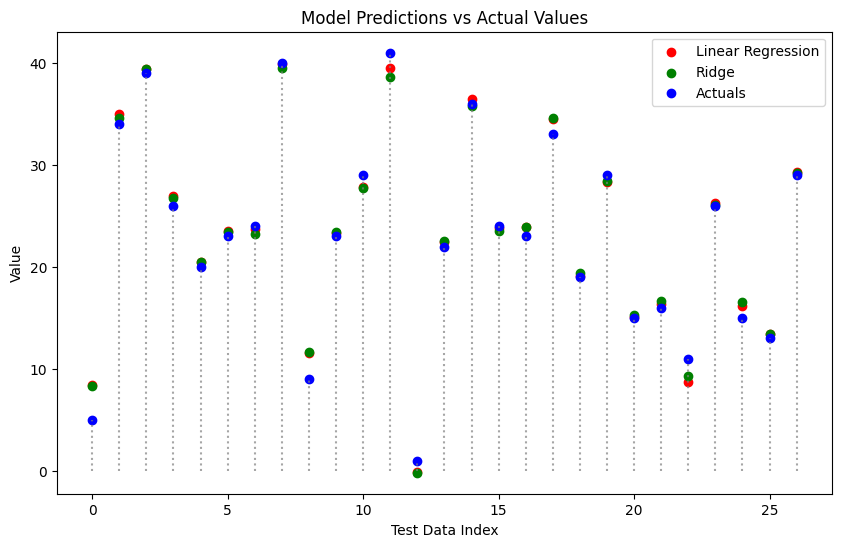

In [59]:
import matplotlib.pyplot as plt

y_test3 = y_test3.astype(int).values

# Drawing scatter plots
plt.figure(figsize=(10, 6))
plt.scatter(range(len(pred_val1)), pred_val1, color='r', label='Linear Regression')
plt.scatter(range(len(pred_val2)), pred_val2, color='g', label='Ridge')
plt.scatter(range(len(y_test3)), y_test3, color='b', label='Actuals')

for i in range(len(y_test3)):
    plt.vlines(x=i, ymin=0, ymax=y_test3[i], colors='gray', linestyles='dotted', alpha=0.7)

plt.xlabel('Test Data Index')
plt.ylabel('Value')
plt.title('Model Predictions vs Actual Values')
plt.legend()

plt.show()

In [60]:
df_mlb_2024_regular['HR'] = df_mlb_2024_regular['HR'].astype('int')
df_mlb_2024_regular[['PLAYER', 'HR']].sort_values('HR', ascending=False).reset_index(drop=True).head(20)

,PLAYER,HR
0,MattOlson,54
1,KyleSchwarber,47
2,PeteAlonso,46
3,ShoheiOhtani,44
4,RonaldAcuña,41
5,MarcellOzuna,40
6,MookieBetts,39
7,AdolisGarcía,39
8,LuisRobert,38
9,AustinRiley,37
